In [1]:
import gdal
import os
os.chdir('/Users/josefk/junk/')
import seppopy.cloud.aws.iam as _iam
_iam.set_aws_credentials()


In [15]:
# srcdataset=gdal.Open('S1A_IW_GRDH_1SDV_20170412T124136_20170412T124201_016111_01A9B4_9968-EBD_vvvh_DN_browse.vrt')
# zipdataset=gdal.Open('/vsizip/aa.zip/S1A_IW_GRDH_1SDV_20170412T124136_20170412T124201_016111_01A9B4_9968-EBD_vvvh_DN_browse.vrt')
s3dataset=gdal.Open('/vsis3/data.earth/test/browse.tif')
s3zipdataset = gdal.Open('/vsizip/vsis3/data.earth/sar/sentinel1/rtc/20.0m/S1B_IW_GRDH_1SSV_20170504T103420_20170504T103445_005447_0098CA_6B58-EBD.zip/S1B_IW_GRDH_1SSV_20170504T103420_20170504T103445_005447_0098CA_6B58-EBD/S1B_IW_GRDH_1SSV_20170504T103420_20170504T103445_005447_0098CA_6B58-EBD_vv_AMP.tif')

In [16]:
s3zipdataset.GetFileList()

['/vsizip/vsis3/data.earth/sar/sentinel1/rtc/20.0m/S1B_IW_GRDH_1SSV_20170504T103420_20170504T103445_005447_0098CA_6B58-EBD.zip/S1B_IW_GRDH_1SSV_20170504T103420_20170504T103445_005447_0098CA_6B58-EBD/S1B_IW_GRDH_1SSV_20170504T103420_20170504T103445_005447_0098CA_6B58-EBD_vv_AMP.tif']

In [21]:
s3zipdataset.GetProjection()

'PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]'

In [22]:
b1 = s3zipdataset.GetRasterBand(1)

In [36]:
ras = b1.ReadAsArray(2000,2000,1000,1000)

In [31]:
ras

array([[   0,    0,    0, ..., 5054, 5430, 5045],
       [   0,    0,    0, ..., 5171, 4986, 4543],
       [   0,    0,    0, ..., 5401, 5273, 5315],
       ..., 
       [   0,    0,    0, ..., 4113, 4644, 4488],
       [   0,    0,    0, ..., 6221, 6125, 5047],
       [   0,    0,    0, ..., 7154, 6659, 5480]], dtype=uint16)

In [25]:
%matplotlib inline
import matplotlib.pylab as plt


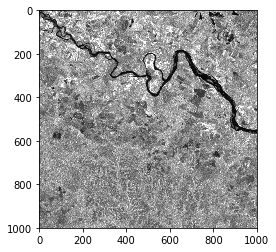

In [37]:
fig = plt.subplot()
fig.imshow(ras,cmap='gray',vmax=10000)

In [34]:
gdal.Translate('aaaaa.tif',s3zipdataset,srcWin=(0,0,100,100))

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x119eac030> >

In [39]:
?gdal.TranslateOptions()

In [68]:
def test(*args,my=None,**kwargs):
    return args,my,kwargs
def test2(*args,**kwargs):
    print(args,kwargs['a'])

In [60]:
a,my,kw = test(3,my='3',a='gggg',b=3)

In [69]:
test2(**kw)

() gggg
